In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2.88024255e+00  2

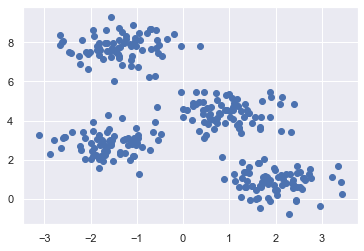

In [36]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
print(X)
plt.scatter(X[:,0], X[:,1])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


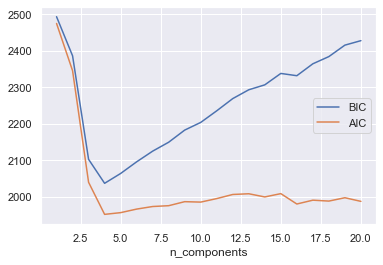

In [11]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [13]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

[3 2 1 2 3 3 0 1 2 2 0 2 1 2 3 1 1 3 0 0 3 3 1 0 0 1 3 1 0 1 2 2 1 2 2 2 2
 2 0 3 1 0 1 1 0 0 2 0 2 3 0 3 2 3 3 0 2 0 2 3 2 1 2 0 0 0 2 3 2 0 1 0 2 0
 0 2 0 1 3 2 3 1 3 3 2 1 3 1 2 2 1 3 2 0 0 1 3 3 1 0 2 3 2 3 1 3 3 1 2 1 0
 0 3 2 3 1 2 3 3 1 0 3 0 3 3 3 3 0 3 0 2 0 0 3 2 0 0 2 1 2 2 0 1 0 1 0 2 1
 2 2 2 1 2 1 3 0 2 0 3 1 2 1 1 3 1 0 0 1 3 1 1 2 3 1 0 2 3 3 1 0 3 1 0 0 1
 1 1 1 3 2 1 0 1 1 0 0 0 1 0 2 1 0 3 0 1 2 0 2 1 2 1 0 1 1 2 0 0 3 3 1 2 3
 3 0 3 0 1 2 2 1 1 2 1 3 0 1 3 0 2 0 3 1 3 2 2 2 2 0 0 2 1 0 3 1 0 0 0 3 3
 2 1 1 0 3 2 0 1 2 1 3 3 0 0 1 3 3 3 1 2 2 3 3 1 3 3 3 2 0 2 1 3 3 2 2 2 3
 3 1 2 0]


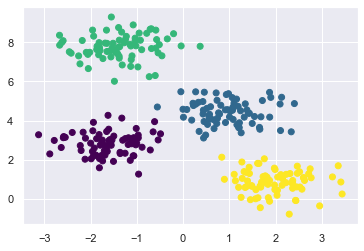

In [15]:
labels = gmm.predict(X)
print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis');

## Text Clustering - KMEANS

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

df = pd.read_excel('D:\\PDFS\\PDFSTCC\\DadosLimpos.xlsx', index=False, usecols = [7])  

text = []

for i in df.values.tolist():
    data = str(i[0]).replace('.', ' ').replace(',', ' ').replace('(', ' ').replace(')', ' ').lower()
    text.append(data)
        
documents = ["negou-se provimento aos recursos  unânime",
             "conhecer  rejeitar a s  preliminar es  e  no mérito dar parcial provimento  unânime",
             "dar parcial provimento  unânime",
             "acolher a preliminar de ilegitimidade passiva dosegundo réu para julgar extinto o processo em relação a ele dar parcial provimento ao recurso da primeira ré  unânime",
             "conhecer e negar provimento  unânime",
             "conhecer parcialmente dorecurso",
             "conhecido  deu-se parcial provimento  unânime",
             "recurso conhecido e não provido  unânime"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["conhecer e negar provimento  unânime"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["dar provimento"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 conhecido
 unânime
 provido
 desprovido
 recurso
 improvido
 provimento
 parcialmente
 negar
 ao
Cluster 1:
 dar
 parcial
 provimento
 conhecer
 unânime
 ao
 recurso
 preliminar
 rejeitar
 lhe
Cluster 2:
 negar
 provimento
 conhecer
 unânime
 ao
 recurso
 rejeitar
 preliminar
 lhe
 apelo


Prediction
[2]
[1]
